### Multi Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import RocCurveDisplay,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv('./glass.csv')
data.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.isnull().mean()*100

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

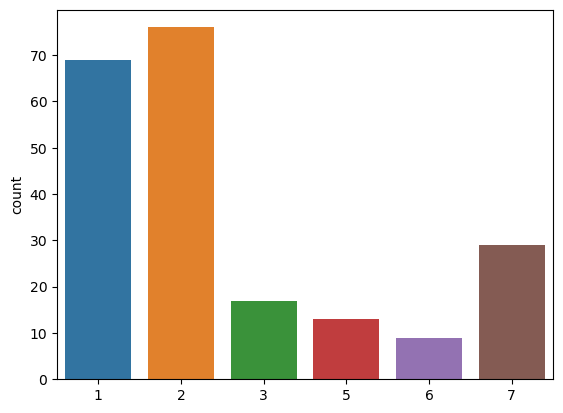

In [10]:
sns.countplot(data=data, x=y)
plt.show()

In [11]:
ROS = RandomOverSampler()

In [12]:
x_over, y_over = ROS.fit_resample(x, y)

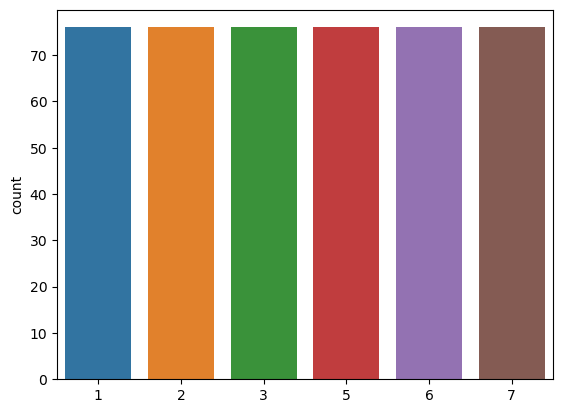

In [13]:
sns.countplot(x=y_over)
plt.show()

In [14]:
sc = StandardScaler()

In [15]:
x = sc.fit_transform(x_over)

models = {'LogisticRegression' : LogisticRegression(),
    'Randomforestclassifier' : RandomForestClassifier(random_state=42),
    'DecisionTreeClassifier' : DecisionTreeClassifier(random_state=42),
    'AdaBoostClassifier' : AdaBoostClassifier(random_state=42),
    'GradientBoostingClassifier' : GradientBoostingClassifier(random_state=42),
    'KNeighborsClassifier' : KNeighborsClassifier()}

In [17]:
x.shape

(456, 9)

In [18]:
y_over.shape

(456,)

In [19]:
y = y_over

#### Model selection using Cross Validation

In [20]:
for name,model in models.items():
    Scores = cross_val_score(model,x,y,scoring='accuracy',cv=10,n_jobs = -1)
    print('cross validation model : {}'.format(name))
    print('mean score :',np.mean(Scores)*100)
    print('-'*50)

cross validation model : LogisticRegression
mean score : 78.72946859903381
--------------------------------------------------
cross validation model : Randomforestclassifier
mean score : 90.35265700483093
--------------------------------------------------
cross validation model : DecisionTreeClassifier
mean score : 89.46859903381643
--------------------------------------------------
cross validation model : AdaBoostClassifier
mean score : 41.60869565217391
--------------------------------------------------
cross validation model : GradientBoostingClassifier
mean score : 91.66666666666666
--------------------------------------------------
cross validation model : KNeiborsClassifier
mean score : 82.8985507246377
--------------------------------------------------


#### We are selecting the RandomForestClassifier as our model since it is having the highest score

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
model = RandomForestClassifier()

In [23]:
model.fit(x_train,y_train)
print('model trained with : Randomforestclassifier')
score_train = accuracy_score(y_train,model.predict(x_train))
score_test = accuracy_score(y_test,model.predict(x_test))
conf_train = confusion_matrix(y_train,model.predict(x_train))
conf_test = confusion_matrix(y_test,model.predict(x_test))
print('model accuracy on train is:', score_train)
print('model accuracy on test is :', score_test)
print('confusion metrix train is:', conf_train)
print('confusion matrix test is :', conf_test)
print('wrong predictions made :',(y_test !=model.predict(x_test)).sum(),'/',((y_test==model.predict(x_test)).sum()+(y_test!=model.predict(x_test)).sum()))


model trained with : Randomforestclassifier
model accuracy on train is: 1.0
model accuracy on test is : 0.9456521739130435
confusion metrix train is: [[63  0  0  0  0  0]
 [ 0 63  0  0  0  0]
 [ 0  0 59  0  0  0]
 [ 0  0  0 61  0  0]
 [ 0  0  0  0 58  0]
 [ 0  0  0  0  0 60]]
confusion matrix test is : [[10  2  1  0  0  0]
 [ 2 11  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0 16]]
wrong predictions made : 5 / 92


In [24]:
ROC_Display = RocCurveDisplay.from_estimator(model.x_test,y_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'x_test'

 We cannot plot ROC curve using RocCurveDisplay function in multi class classification.
It can plot using some other function